In [ ]:
# Unsupervised Learning: Clustering
#The task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups
# Examples:
  # Natural Language Processing (NLP)
  # Computer Vision
  # Stock markets
  # Customer/Market Segmentation
#Types:
  # Connectivity-based
    # Distance based
    # E.g. Hierarchical clustering
  # Centroid-based
    # Represents each cluster by a single mean vector
    # e.g. k-means algorithm
  # Distribution-based
    # Modeled using statistical distributions
    #E.g. Multivariate normal distributions used by the expectation-maximization algorithm
  # Density-based
    # Defines clusters as connected dense regions in the data space
    # E.g. DBSCAN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

#Initializing classifiers
clf1 = LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto')
clf2 = RandomForestClassifier(random_state=0,n_estimators=100)
clf3 = SVC(random_state=0, probability=True, gamma='auto')
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2,1,1], voting='soft')
labels = ['Logistic Regression', 'Random Forest', 'RBF SVM', 'Ensemble']


In [ ]:
#loading some example data
X,Y = iris_data()

In [ ]:
X = X[:,[0,2]]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


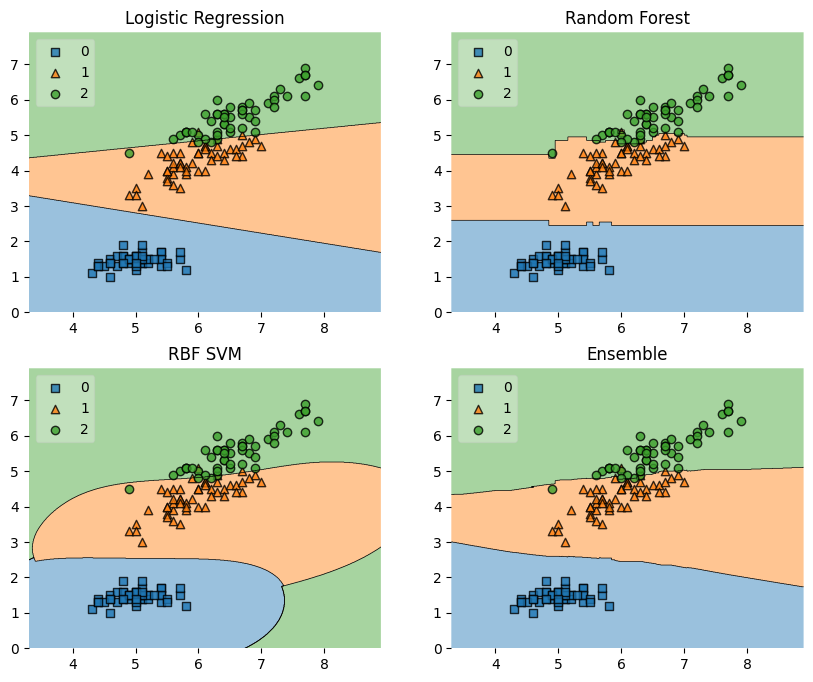

In [ ]:
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1,clf2,clf3,eclf],labels,itertools.product([0,1],repeat=2)):
  clf.fit(X,Y)
  ax = plt.subplot(gs[grd[0],grd[1]])
  fig = plot_decision_regions(X=X, y=Y, clf=clf, legend=2)
  plt.title(lab)
plt.show()

In [ ]:
# Hierchical


In [ ]:
from sklearn.datasets import make_blobs
X,Y = make_blobs(n_samples=600, centers=5, cluster_std=0.6, random_state=42)

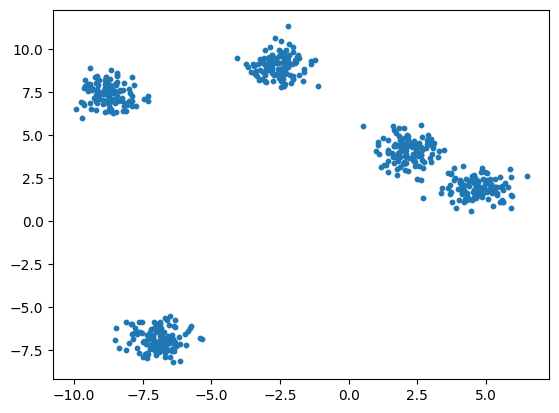

In [ ]:
plt.scatter(X[:,0],X[:,1],s=10)

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
distance = linkage(X, 'ward')

In [ ]:
distance

array([[1.05000000e+02, 5.28000000e+02, 2.11565697e-03, 2.00000000e+00],
       [7.00000000e+01, 3.01000000e+02, 7.17038863e-03, 2.00000000e+00],
       [1.74000000e+02, 3.58000000e+02, 7.41240066e-03, 2.00000000e+00],
       ...,
       [1.19000000e+03, 1.19300000e+03, 6.99900010e+01, 2.40000000e+02],
       [1.19500000e+03, 1.19600000e+03, 1.62402229e+02, 4.80000000e+02],
       [1.19100000e+03, 1.19700000e+03, 1.91095481e+02, 6.00000000e+02]])

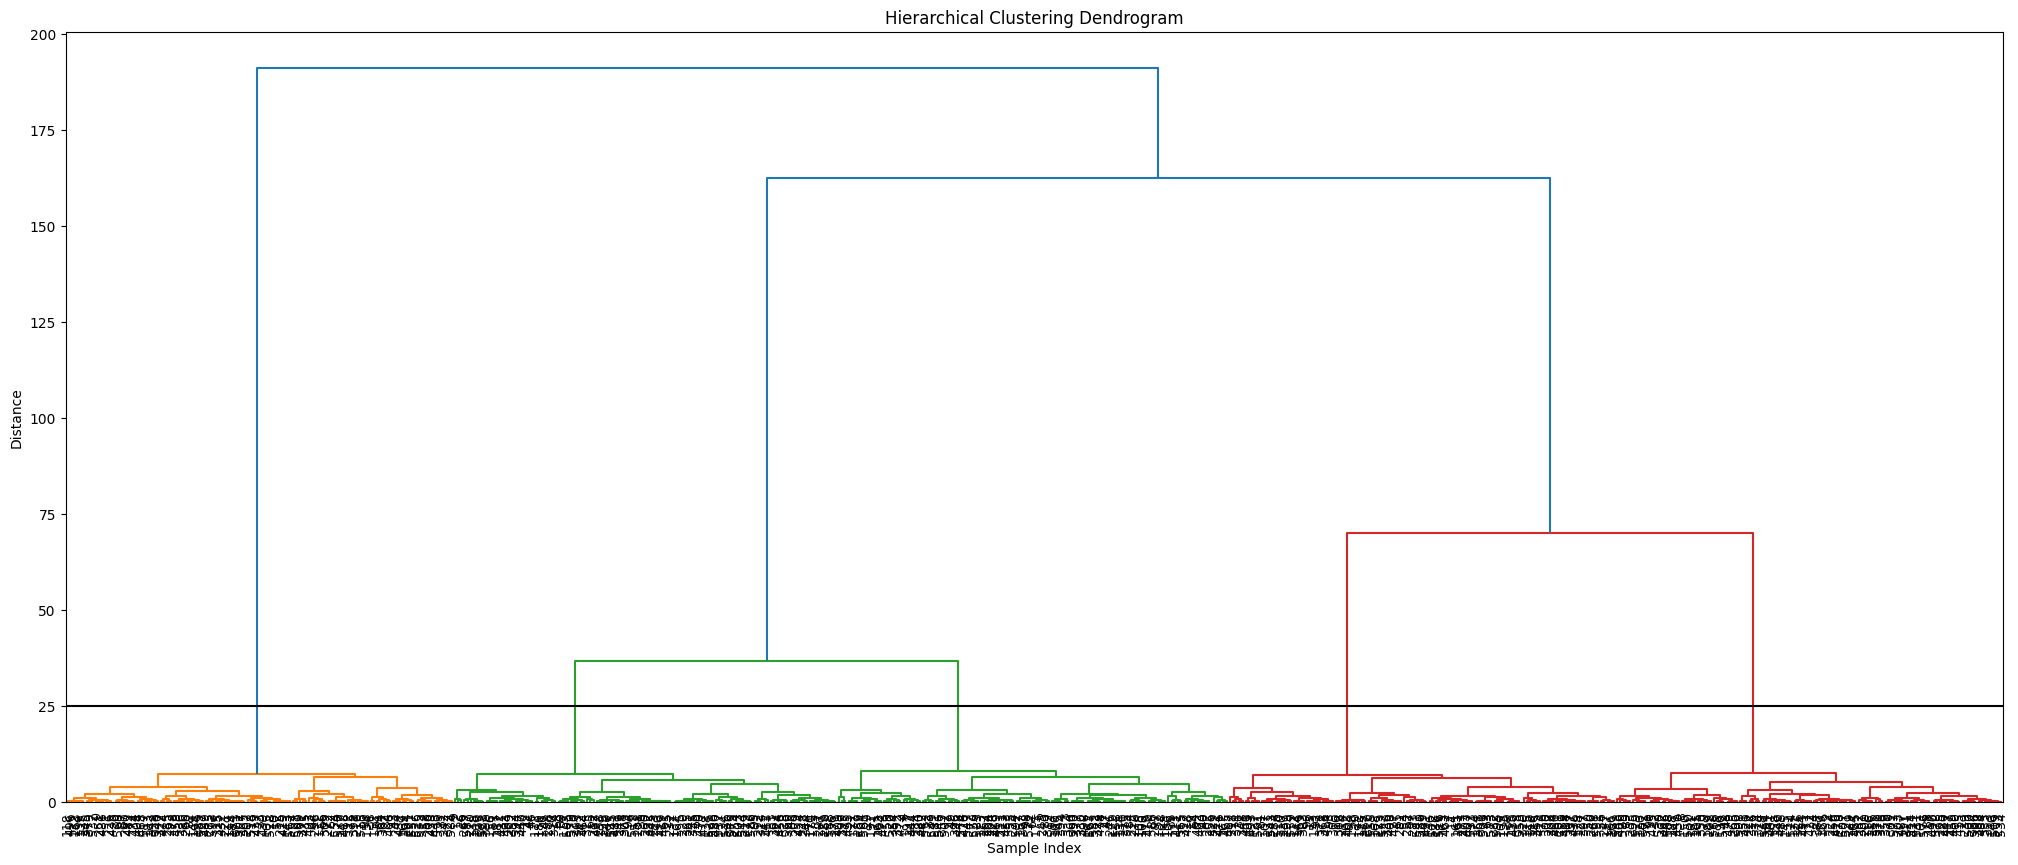

In [ ]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(distance,leaf_rotation=90,leaf_font_size=9)
plt.axhline(25,c='k')
plt.show()


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0]],
 'dcoord': [[0.0,
   np.float64(36.55598160502717),
   np.float64(36.55598160502717),
   0.0],
  [0.0, np.float64(69.99000102183193), np.float64(69.99000102183193), 0.0],
  [np.float64(36.55598160502717),
   np.float64(162.40222920235217),
   np.float64(162.40222920235217),
   np.float64(69.99000102183193)],
  [0.0,
   np.float64(191.095481440824),
   np.float64(191.095481440824),
   np.float64(162.40222920235217)]],
 'ivl': ['(120)', '(119)', '(121)', '(120)', '(120)'],
 'leaves': [1191, 1192, 1194, 1190, 1193],
 'color_list': ['C1', 'C2', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1', 'C2', 'C2']}

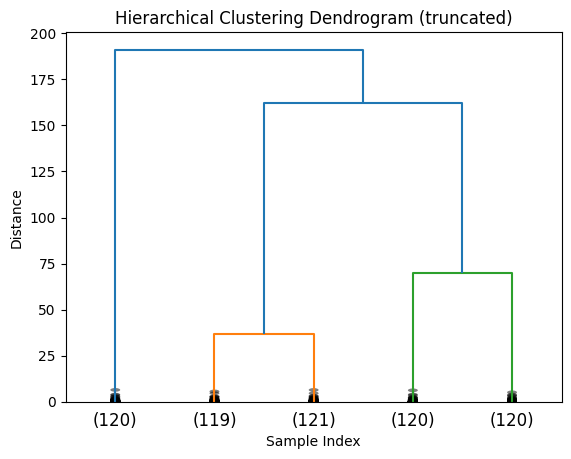

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(distance,truncate_mode='lastp',p=5,show_contracted=True,leaf_rotation=0,leaf_font_size=12)

In [ ]:
# Given a point, how to know which cluster it belongs?
# By Distance
# Use the fcluster function
from scipy.cluster.hierarchy import fcluster
max_d = 25
clusters = fcluster(distance, max_d, criterion='distance')
clusters

array([1, 1, 5, 3, 3, 2, 3, 4, 5, 2, 1, 5, 2, 4, 4, 1, 4, 3, 5, 3, 4, 3,
       2, 5, 5, 2, 2, 3, 3, 3, 1, 4, 5, 1, 1, 3, 2, 2, 1, 4, 3, 2, 2, 1,
       1, 2, 2, 3, 5, 3, 4, 2, 1, 2, 4, 3, 4, 1, 1, 3, 2, 4, 1, 4, 3, 2,
       1, 3, 2, 2, 5, 3, 1, 3, 5, 1, 4, 5, 1, 5, 3, 1, 1, 3, 3, 4, 3, 1,
       5, 5, 5, 1, 4, 4, 2, 2, 4, 4, 3, 1, 3, 5, 4, 5, 5, 1, 3, 4, 3, 4,
       4, 5, 4, 3, 5, 2, 5, 4, 1, 1, 5, 5, 3, 3, 2, 4, 4, 4, 5, 2, 2, 1,
       1, 4, 3, 4, 2, 2, 2, 1, 5, 2, 2, 1, 4, 5, 4, 1, 2, 1, 5, 2, 1, 4,
       1, 4, 2, 3, 5, 5, 3, 3, 3, 4, 2, 4, 4, 3, 4, 1, 2, 2, 2, 4, 4, 3,
       2, 3, 4, 3, 2, 5, 3, 1, 1, 2, 4, 2, 5, 5, 2, 3, 4, 3, 1, 2, 5, 3,
       4, 2, 5, 4, 3, 5, 3, 5, 1, 1, 2, 2, 3, 3, 2, 3, 4, 1, 1, 5, 4, 2,
       2, 1, 5, 2, 5, 4, 1, 4, 3, 5, 2, 4, 2, 5, 3, 1, 1, 4, 4, 5, 4, 2,
       1, 3, 1, 3, 3, 4, 2, 2, 2, 1, 4, 5, 2, 3, 5, 1, 2, 2, 2, 4, 3, 1,
       3, 5, 1, 4, 4, 2, 2, 2, 1, 2, 3, 1, 3, 4, 5, 1, 5, 4, 5, 4, 4, 1,
       5, 2, 2, 3, 1, 1, 2, 1, 1, 5, 1, 3, 5, 4, 4,

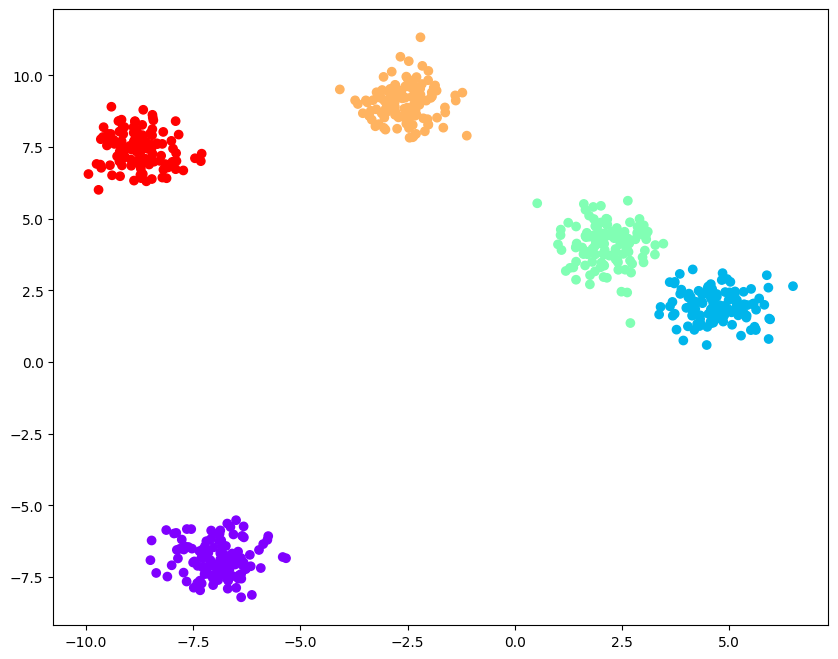

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c=clusters,cmap='rainbow')
plt.show()

In [ ]:
# By Clusters
k = 9
clusters = fcluster(distance, k, criterion='maxclust')

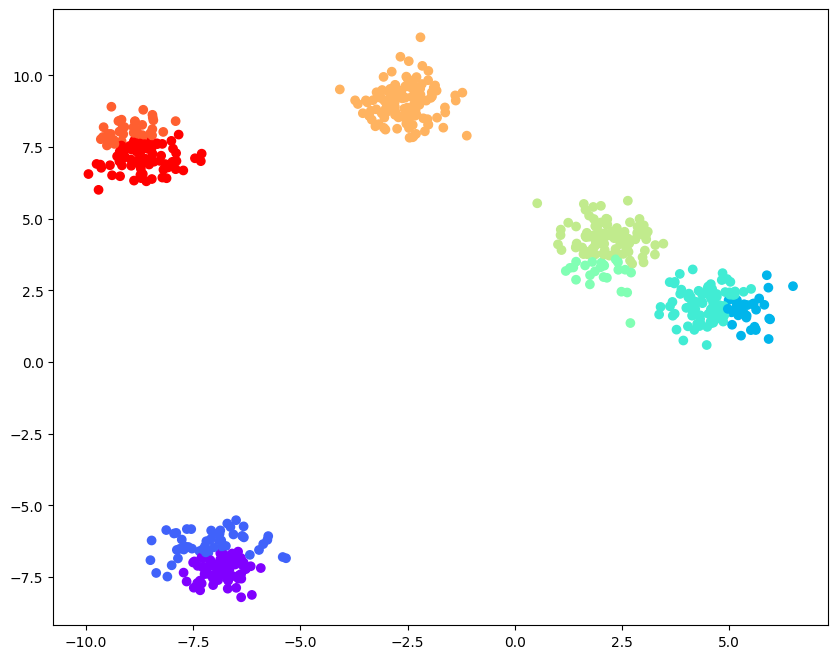

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c=clusters,cmap='rainbow')
plt.show()

In [ ]:
# k-means clustering
#analyse and find patterns/clusters within data
#distance measures

#clusters data by trying to seperate samples in n groups of equal variance
#minimizing a criterion known as the inertia or within-cluster sum-of-squares
#requires the number of clusters to be specified
#scales well
#How does it work:
  # Divides a set of samples into disjoint clusters
  # Each described by the mean of the samples in the cluser
  # The means are commonly called the cluster 'centroids'
  # Note that the centroids are not, in general, points from, although they live in the same space.
  # The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

KMeans(n_clusters=9)

In [ ]:
y_kmeans = kmeans.predict(X)

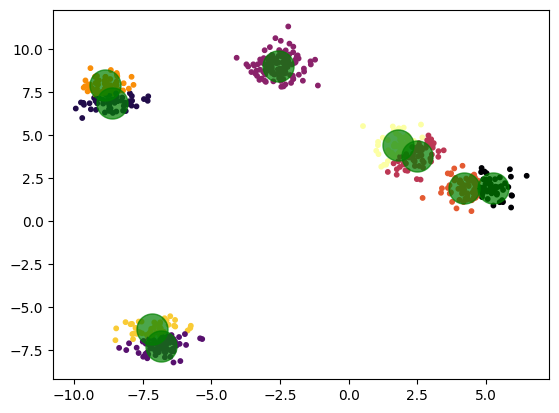

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=10,cmap='inferno')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='green',s=500,alpha=0.7)

/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

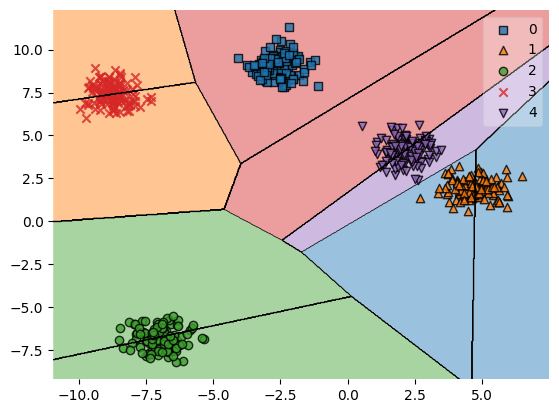

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y,clf=kmeans)


In [ ]:
#How to choose the number of clusters?
# The Elbow Method

kmeans.inertia_

293.60744481704484

In [ ]:
sse_ = []
for k in range(1,8):
  kmeans = KMeans(n_clusters=k).fit(X)
  sse_.append([k,kmeans.inertia_])

In [ ]:
sse_

[[1, 34981.345596806124],
 [2, 21922.454071148797],
 [3, 3535.362058309281],
 [4, 1086.061936791259],
 [5, 414.43384934994697],
 [6, 383.97180454778123],
 [7, 352.70456482604936]]

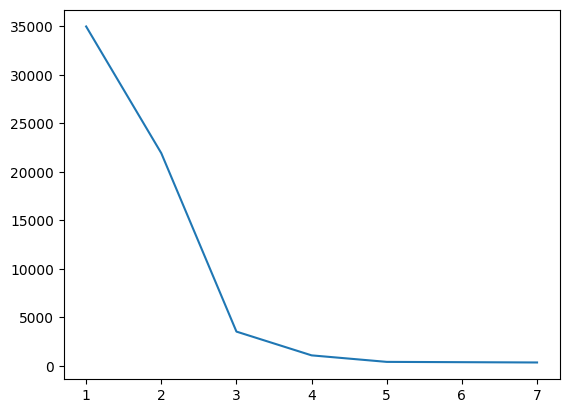

In [ ]:
import pandas as pd
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])

In [ ]:
# Select the number of k where the elbow (knik) occurs

In [ ]:
# Silhouette Analysis for secting the value for k
# silhouette score = (p-q)/(max(p,q))
# where p = mean distance to the points in the nearest cluster that the data point is not part of
# and q = mean intra_cluster distance to all point in its own cluster
  # the value of the silhouette score range lies between -1 and 1
  # a score closer to 1 indicates that the data point is very similar to other data points in the cluster
  # a score closter to -1 indicates that the data point is not similar to the data points in its cluster


In [ ]:
from sklearn.metrics import silhouette_score

sse_ = []
for k in range(2,8):
  kmeans = KMeans(n_clusters=k).fit(X)
  sse_.append([k,silhouette_score(X,kmeans.labels_)])

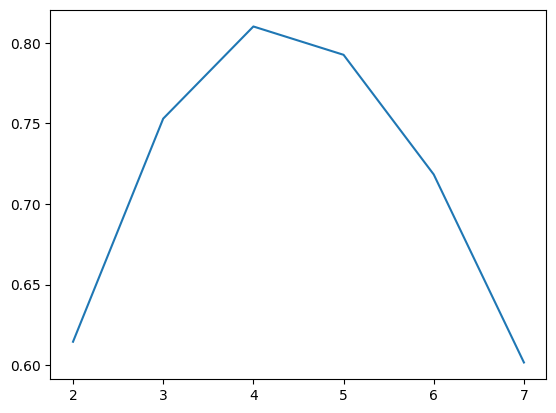

In [ ]:
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])

In [ ]:
# Best K is at the maximum of silhouette score plot

In [ ]:
# Mean shift method to select the optimal k values
#Non-paramatic, will identify it for you
# identify centroids location
  # for each data point, it identifies a window around it
  # computes centroid
  # updates centroid location
  # continue to update window
  # keep shifting the centroids, means, towards the peaks of each cluster, Hence the term means shift
  # continues until centroids no longer move
# Used for object tracking

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

bandwith_X = estimate_bandwidth(X,quantile=0.1, n_samples=len(X))
meanshift_model = MeanShift(bandwidth=bandwith_X, bin_seeding=True)
meanshift_model.fit(X)

cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters: \n',cluster_centers)

meanshift_model.labels_


Centers of clusters: 
 [[-2.67328294  8.99938097]
 [ 4.68368104  1.95180624]
 [-8.78901201  7.46865483]
 [ 2.23745877  4.18435672]
 [-6.92346681 -7.03225928]]


array([4, 4, 2, 3, 3, 1, 3, 0, 2, 1, 4, 2, 1, 0, 0, 4, 0, 3, 2, 3, 0, 3,
       1, 2, 2, 1, 1, 3, 3, 3, 4, 0, 2, 4, 4, 3, 1, 1, 4, 0, 3, 1, 1, 4,
       4, 1, 1, 3, 2, 3, 0, 1, 4, 1, 0, 3, 0, 4, 4, 3, 1, 0, 4, 0, 3, 1,
       4, 3, 1, 1, 2, 3, 4, 3, 2, 4, 0, 2, 4, 2, 3, 4, 4, 3, 3, 0, 3, 4,
       2, 2, 2, 4, 0, 0, 1, 1, 0, 0, 3, 4, 3, 2, 0, 2, 2, 4, 3, 0, 3, 0,
       0, 2, 0, 3, 2, 1, 2, 0, 4, 4, 2, 2, 3, 3, 1, 0, 0, 0, 2, 1, 1, 4,
       4, 0, 3, 0, 1, 1, 1, 4, 2, 1, 1, 4, 0, 2, 0, 4, 1, 4, 2, 1, 4, 0,
       4, 0, 1, 3, 2, 2, 3, 3, 3, 0, 1, 0, 0, 3, 0, 4, 1, 1, 1, 0, 0, 3,
       1, 3, 0, 3, 1, 2, 3, 4, 4, 1, 0, 1, 2, 2, 1, 3, 0, 3, 4, 1, 2, 3,
       0, 1, 2, 0, 3, 2, 3, 2, 4, 4, 1, 1, 3, 3, 1, 3, 0, 4, 4, 2, 0, 1,
       1, 4, 2, 1, 2, 0, 4, 0, 3, 2, 1, 0, 1, 2, 3, 4, 4, 0, 0, 2, 0, 1,
       4, 3, 4, 3, 3, 0, 1, 1, 1, 4, 0, 2, 1, 3, 2, 4, 1, 1, 1, 0, 3, 4,
       3, 2, 4, 0, 0, 1, 1, 1, 4, 1, 3, 4, 3, 0, 2, 4, 2, 0, 2, 0, 0, 4,
       2, 1, 1, 3, 4, 4, 1, 4, 4, 2, 4, 3, 2, 0, 0,

In [ ]:
bandwith_X

np.float64(0.9946702350329211)

In [ ]:
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print('\nNumber of clusters in input data = \n',num_clusters)


Number of clusters in input data = 
 5


Text(0.5, 1.0, 'Clusters')

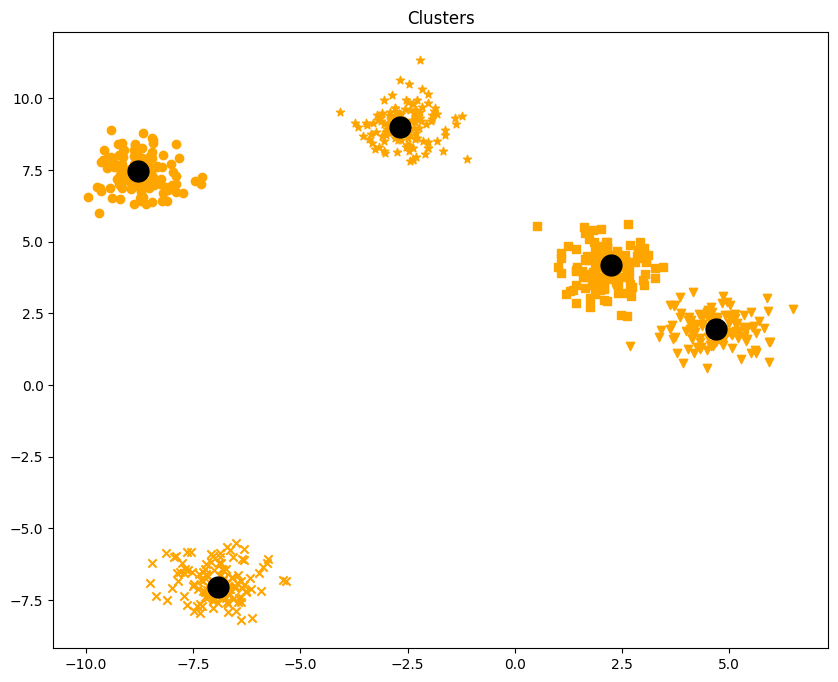

In [ ]:
plt.figure(figsize=(10,8))
markers = '*vosx'
for i,marker in zip(range(num_clusters),markers):
  plt.scatter(X[labels==i,0],X[labels==i,1],marker=marker, color='orange')
  cluster_center = cluster_centers[i]
  plt.plot(cluster_center[0],cluster_center[1],'o',markerfacecolor='black',markeredgecolor='black',markersize=15)
plt.title('Clusters')